# YLearn Case Study - Infant Health and Development Program

## Content
  
 1. Summary  
 2. Dataset  
 3. Analysis  
     A. No Treatment  
     B. AB Test Analysis  
     C. Best choice  
     D. Policy choice  
 4. Comparison

## 1. Summary

This notebook utilizes IHDP dataset to demonstrate the usage on Policy Interpreter in Precision in Estimation of Heterogenous Effects.

## 2. Dataset

Hill introduced a semi-synthetic dataset constructed from the Infant Health and Development Program (IHDP). This dataset is based on a randomized experiment investigating the effect of home visits by specialists on future cognitive scores. The IHDP simulation is considered the de-facto standard benchmark for neural network treatment effect estimation methods.

Depend on the fields of y_factual and y_cfactual in this dataset, we will look into the usage of the Policy interpreter and compare different policy.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import numpy as np
import pandas as pd
from matplotlib import pyplot  as plt

from sklearn.model_selection import train_test_split
from ylearn import Why

In [2]:
# load all ihadp data
df = pd.DataFrame()
for i in range(1, 10):
    data = pd.read_csv(r'data/ihdp_npci_' + str(i) + '.csv', header=None)
    df = pd.concat([data, df])
df = df.head(10000)
cols =  ["treatment", "y_factual", "y_cfactual", "mu0", "mu1"] + ['x' + str(i) for i in range(25)]
df.columns = cols
print(df.shape)

(6723, 30)


In [3]:
df.head()

,treatment,y_factual,y_cfactual,mu0,mu1,x0,x1,x2,x3,x4,...,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24
0,1,49.647921,34.950762,37.173291,50.383798,-0.528603,-0.343455,1.128554,0.161703,-0.316603,...,1,1,1,1,0,0,0,0,0,0
1,0,16.073412,49.435313,16.087249,49.546234,-1.736945,-1.802002,0.383828,2.244320,-0.629189,...,1,1,1,1,0,0,0,0,0,0
2,0,19.643007,48.598210,18.044855,49.661068,-0.807451,-0.202946,-0.360898,-0.879606,0.808706,...,1,0,1,1,0,0,0,0,0,0
3,0,26.368322,49.715204,24.605964,49.971196,0.390083,0.596582,-1.850350,-0.879606,-0.004017,...,1,0,1,1,0,0,0,0,0,0
4,0,20.258893,51.147418,20.612816,49.794120,-1.045229,-0.602710,0.011465,0.161703,0.683672,...,1,1,1,1,0,0,0,0,0,0


### 3. Analysis

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import numpy as np
import pandas as pd
from matplotlib import pyplot  as plt

from sklearn.model_selection import train_test_split
from ylearn import Why

In [5]:
# load all ihadp data
df = pd.DataFrame()
for i in range(1, 10):
    data = pd.read_csv(r'data/ihdp_npci_' + str(i) + '.csv', header=None)
    df = pd.concat([data, df])
df = df.head(10000)
cols =  ["treatment", "y_factual", "y_cfactual", "mu0", "mu1"] + ['x' + str(i) for i in range(25)]
df.columns = cols
print(df.shape)

(6723, 30)


In [6]:
df.head()

,treatment,y_factual,y_cfactual,mu0,mu1,x0,x1,x2,x3,x4,...,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24
0,1,49.647921,34.950762,37.173291,50.383798,-0.528603,-0.343455,1.128554,0.161703,-0.316603,...,1,1,1,1,0,0,0,0,0,0
1,0,16.073412,49.435313,16.087249,49.546234,-1.736945,-1.802002,0.383828,2.244320,-0.629189,...,1,1,1,1,0,0,0,0,0,0
2,0,19.643007,48.598210,18.044855,49.661068,-0.807451,-0.202946,-0.360898,-0.879606,0.808706,...,1,0,1,1,0,0,0,0,0,0
3,0,26.368322,49.715204,24.605964,49.971196,0.390083,0.596582,-1.850350,-0.879606,-0.004017,...,1,0,1,1,0,0,0,0,0,0
4,0,20.258893,51.147418,20.612816,49.794120,-1.045229,-0.602710,0.011465,0.161703,0.683672,...,1,1,1,1,0,0,0,0,0,0


#### A. No Treament
First, look at mean value of y_factual where unit didn't get treament.

In [7]:
df_cp= df.copy()
def policy_no_t(row):
    return row['y_factual'] if row['treatment'] == 0 else row['y_cfactual']
v_no_t = df_cp.apply(policy_no_t, axis = 1)
v_no_t.mean()

8.143554963831352

#### B. AB Test Analysis

Regard the data as A/B test and compare the mean value with and without treatment.

In [8]:
df_full = df
(df_full[df_full['treatment'] ==1]['y_factual'].mean(),
 df_full[df_full['treatment'] ==0]['y_factual'].mean(),
 df_full[df_full['treatment'] ==1]['y_factual'].mean()-df_full[df_full['treatment'] ==0]['y_factual'].mean())

(12.903212272981092, 7.956019698676378, 4.947192574304714)

Conclusion: in the full dataset, the effect of participating in treatment is significantly better than that of not participating in treatment.   
Then apply the treatment strategy to all unit.

In [9]:
def policy_from_AB(row):
    return row['y_factual'] if row['treatment'] == 1 else row['y_cfactual']
v_AB = df_full.apply(policy_from_AB, axis = 1)
v_AB.mean()

12.903273490915534

B. AB Test Analysis
Regard the data as A/B test and compare the mean value with and without treatment.

In [10]:
train_data = df_full.drop(['y_cfactual','mu0','mu1'],axis=1).reset_index(drop=True)

#### C. Best line
According to the actual value and factual value, the best treatment choice is drawn up. That is, choose the maximum of the two as the best performance reference.

In [11]:
def policy_best(row):
    return row['y_factual'] if row['y_factual'] > row['y_cfactual'] else row['y_cfactual']
v_best = df_cp.apply(policy_best, axis = 1)
v_best.mean()

13.70469638720998

#### D. Policy interpreter 
Through why's policy interpreter, formulate heterogeneous strategies.

[Text(0.5, 0.8333333333333334, 'x5 <= 2.372\nsamples = 6723\nvalue = [[0.0]\n[4.73]]'),
 Text(0.25, 0.5, 'x0 <= 1.5\nsamples = 6642\nvalue = [[0.0]\n[4.81]]'),
 Text(0.125, 0.16666666666666666, 'samples = 6588\nvalue = [[0.0]\n[4.861]]'),
 Text(0.375, 0.16666666666666666, 'samples = 54\nvalue = [[0.0]\n[-1.449]]'),
 Text(0.75, 0.5, 'x1 <= 0.197\nsamples = 81\nvalue = [[0.0]\n[-1.819]]'),
 Text(0.625, 0.16666666666666666, 'samples = 27\nvalue = [[0.0]\n[2.095]]'),
 Text(0.875, 0.16666666666666666, 'samples = 54\nvalue = [[0.0]\n[-3.776]]')]

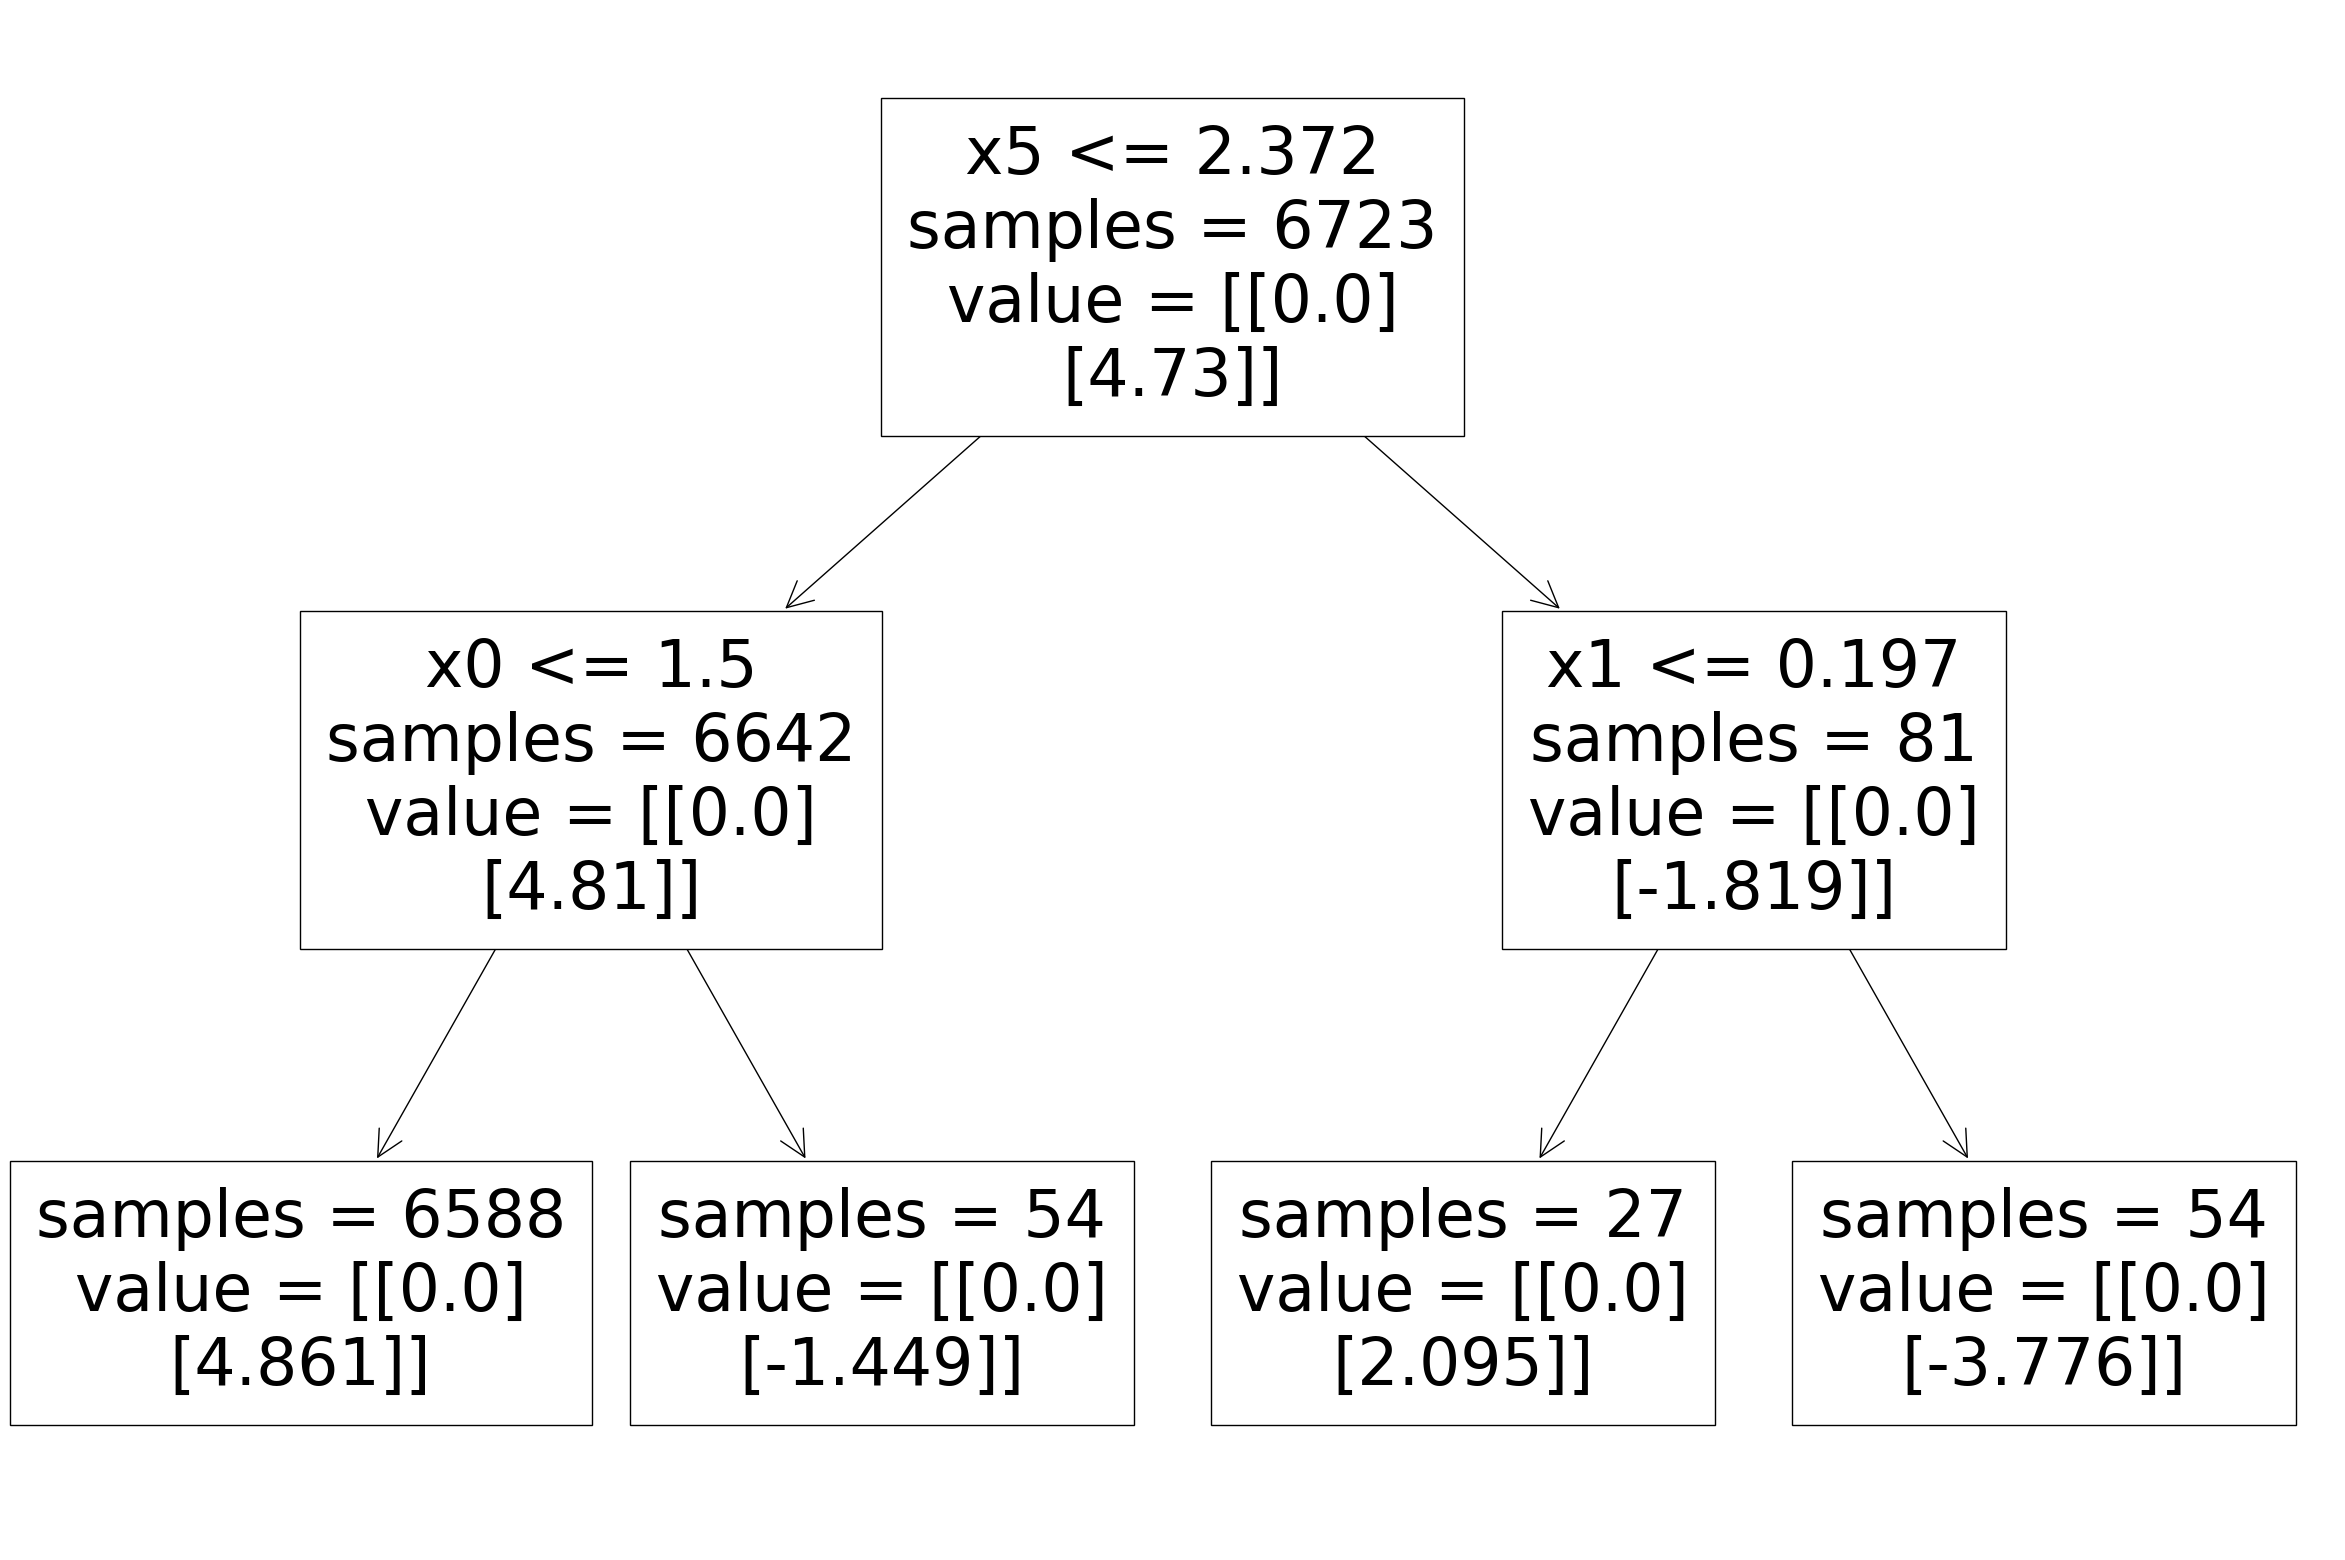

In [12]:
why=Why()
why.fit(train_data,outcome='y_factual',treatment='treatment')

pi=why.policy_interpreter(train_data, max_depth=2)
plt.figure(figsize=(30, 20), )
pi.plot()

In [13]:
def policy_from_ti(row):
    if row['x5'] <= 2.372:
        if row['x0'] > 1.5:
            return 0
    else:
        if row['x1'] > 0.197:
            return 0
    return 1
t_from_policy = df.apply(policy_from_ti, axis = 1)
df_cp= df.copy()
df_cp['policy'] = t_from_policy
v_policy = df_cp.apply(lambda d: d['y_factual'] if d['treatment']==d['policy'] 
               else d['y_cfactual'], 
               axis=1)
v_policy.mean()

12.935318049863566

## 4. comparison

,Mean of Y
No Treament,8.143555
Policy from AB Test,12.903273
Policy from Interpreter,12.935318
Best Line,13.704696


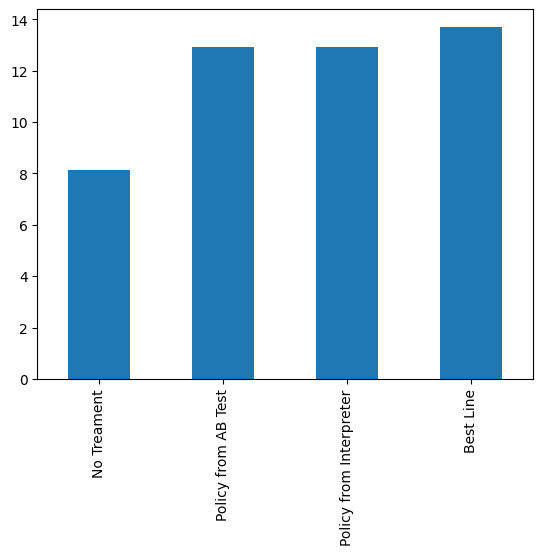

In [14]:
summary=pd.Series({
    'No Treament': v_no_t.mean(),
    'Policy from AB Test': v_AB.mean(),
    'Policy from Interpreter': v_policy.mean(),
    'Best Line': v_best.mean()
    },name=f'Mean of Y').to_frame()
summary.plot(kind='bar',legend=False)
summary

Conclusion: through strategy learning and treatment, the overall score of the unit can be improved slightly.

[Text(0.4230769230769231, 0.875, 'x5 <= 2.372\nsamples = 6723\nvalue = [[0.0]\n[4.73]]'),
 Text(0.15384615384615385, 0.625, 'x0 <= 1.5\nsamples = 6642\nvalue = [[0.0]\n[4.81]]'),
 Text(0.07692307692307693, 0.375, 'samples = 6588\nvalue = [[0.0]\n[4.861]]'),
 Text(0.23076923076923078, 0.375, 'x11 <= 0.5\nsamples = 54\nvalue = [[0.0]\n[-1.449]]'),
 Text(0.15384615384615385, 0.125, 'samples = 45\nvalue = [[0.0]\n[-1.317]]'),
 Text(0.3076923076923077, 0.125, 'samples = 9\nvalue = [[0.0]\n[-2.108]]'),
 Text(0.6923076923076923, 0.625, 'x1 <= 0.197\nsamples = 81\nvalue = [[0.0]\n[-1.819]]'),
 Text(0.5384615384615384, 0.375, 'x14 <= 0.5\nsamples = 27\nvalue = [[0.0]\n[2.095]]'),
 Text(0.46153846153846156, 0.125, 'samples = 18\nvalue = [[0.0]\n[0.523]]'),
 Text(0.6153846153846154, 0.125, 'samples = 9\nvalue = [[0.0]\n[5.239]]'),
 Text(0.8461538461538461, 0.375, 'x4 <= -0.692\nsamples = 54\nvalue = [[0.0]\n[-3.776]]'),
 Text(0.7692307692307693, 0.125, 'samples = 27\nvalue = [[0.0]\n[0.88]]'),
 T

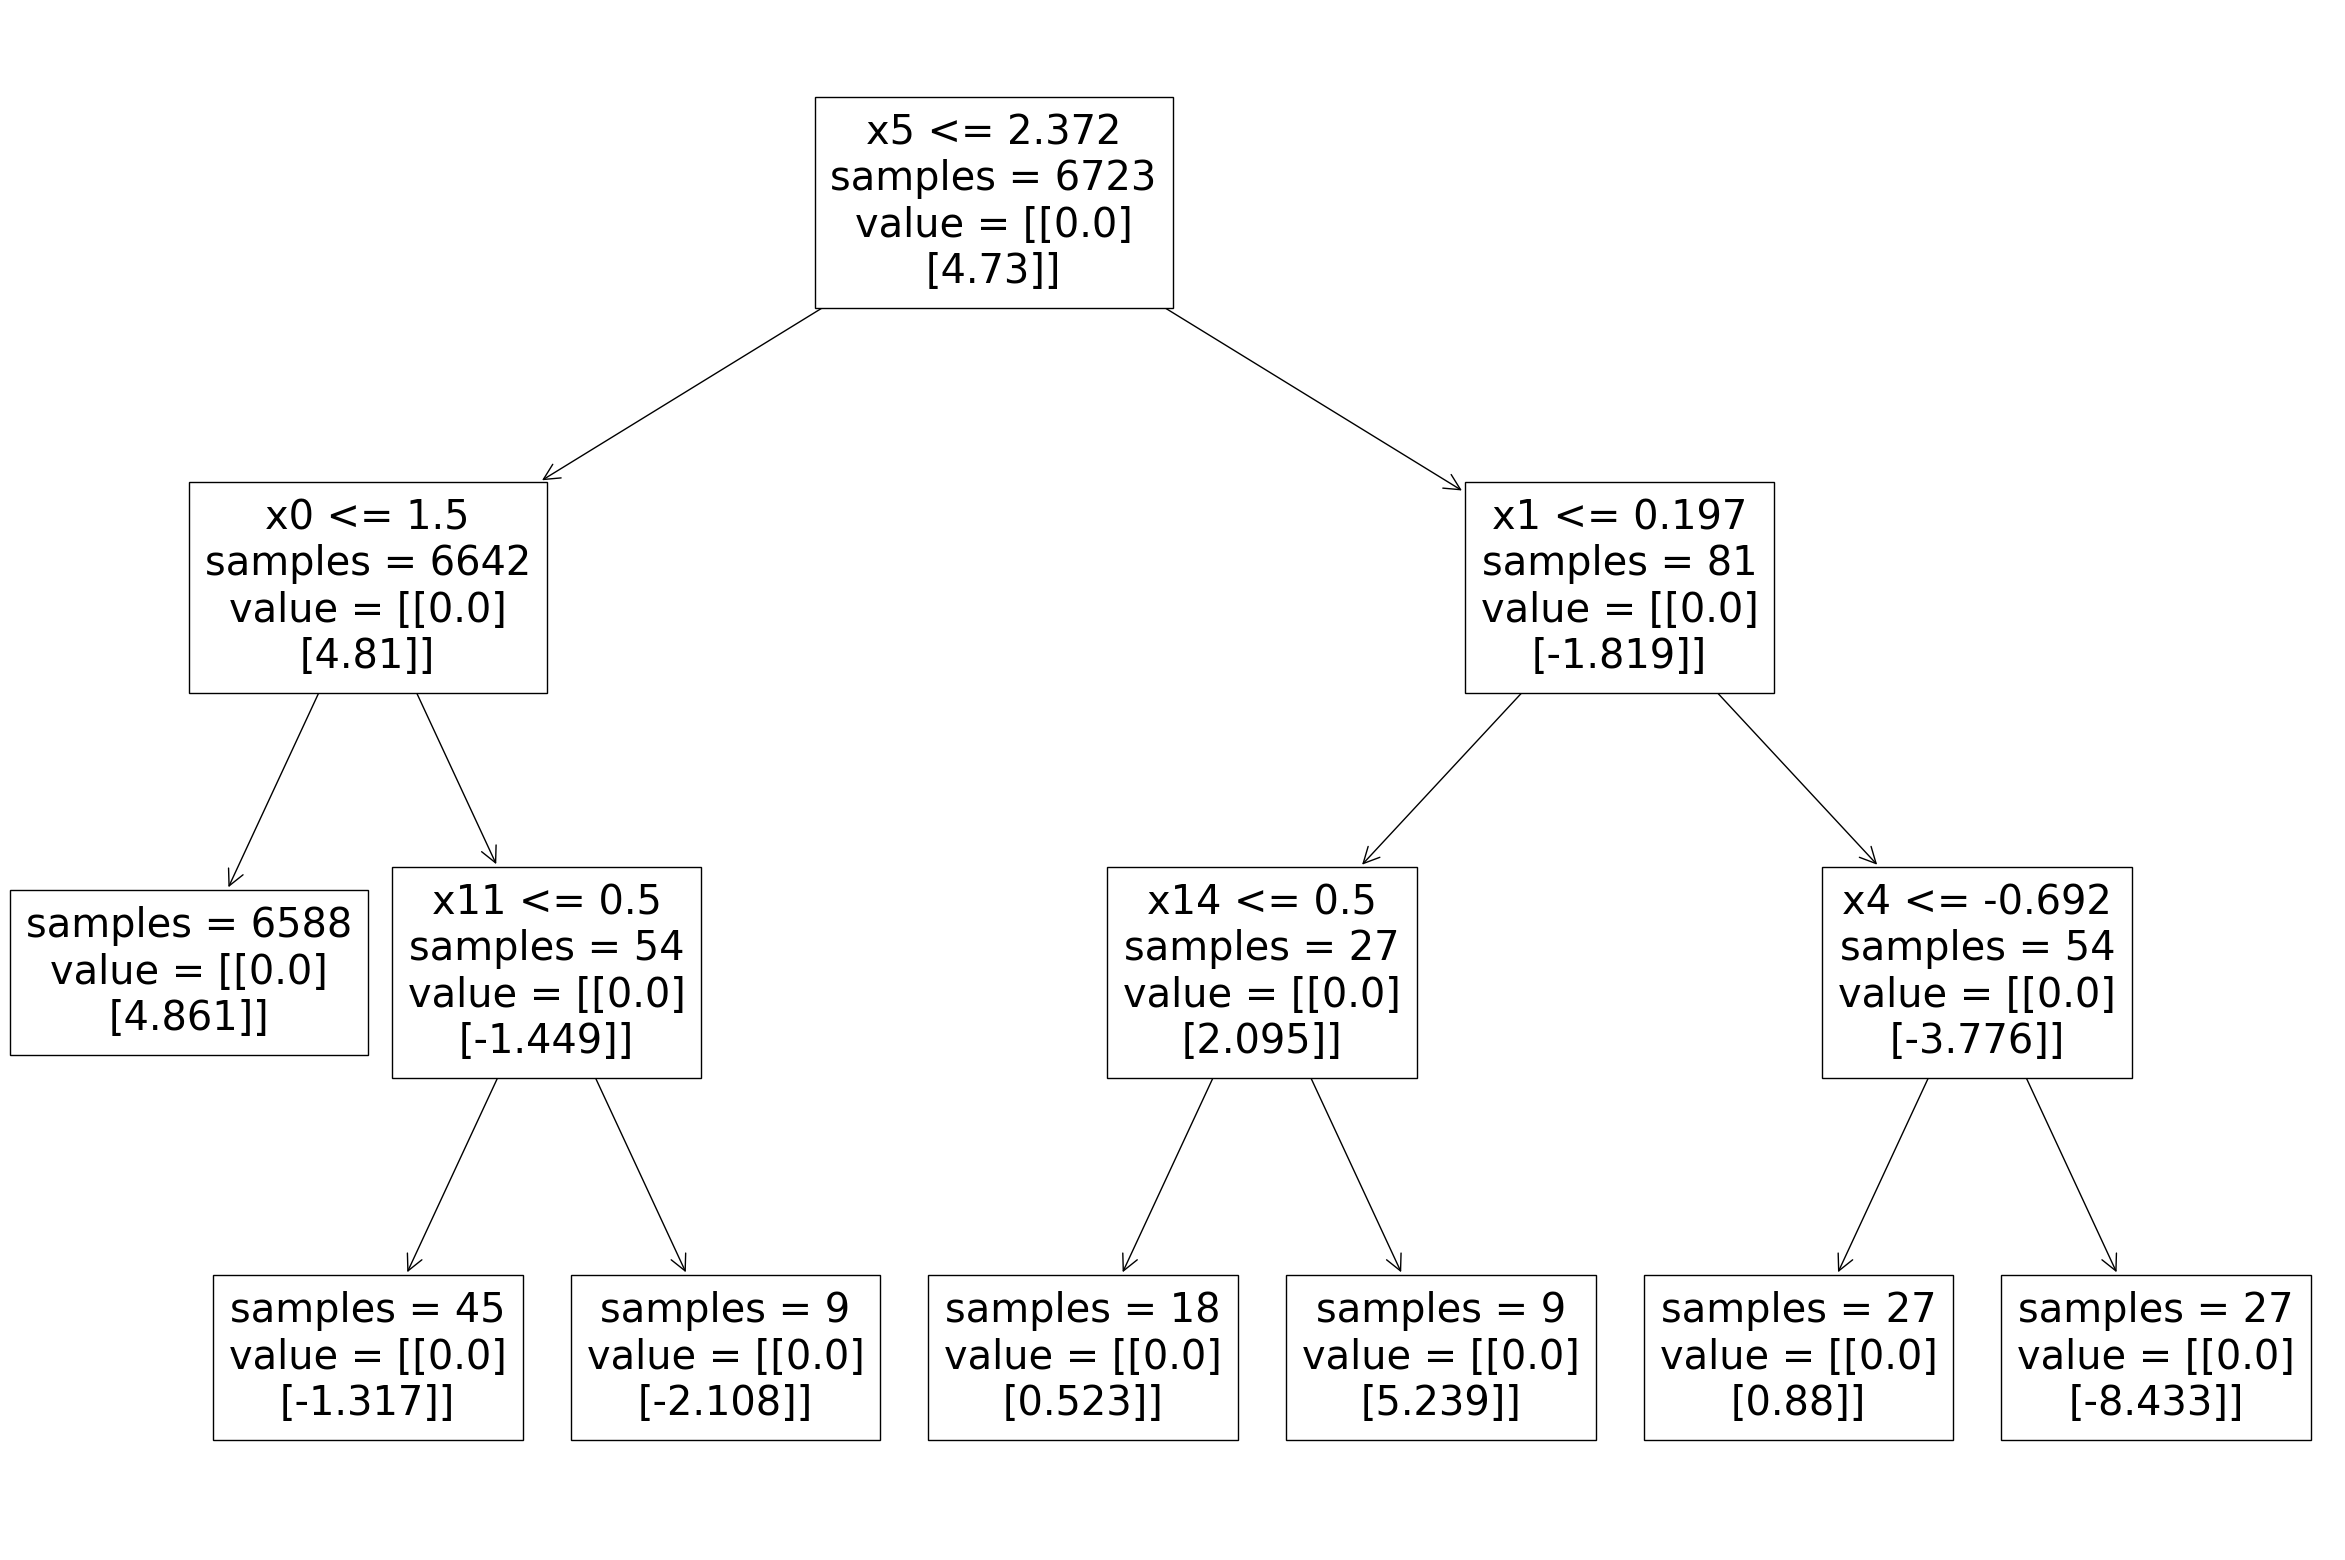

In [15]:
pi=why.policy_interpreter(train_data, max_depth=3)
plt.figure(figsize=(30, 20), )
pi.plot()

In [16]:
def policy_from_ti3(row):
    if row['x5'] <= 2.372:
        if row['x0'] > 1.5:
            return 0
    else:
        if row['x1'] > 0.197:
            if row['x4']> -0.692:
                return 0
    return 1
t_from_policy3 = df.apply(policy_from_ti3, axis = 1)
df_cp3= df.copy()
df_cp3['policy'] = t_from_policy3
v_policy3 = df_cp3.apply(lambda d: d['y_factual'] if d['treatment']==d['policy'] 
               else d['y_cfactual'], 
               axis=1)
v_policy3.mean()

12.939721789740492

,Mean of Y
No Treament,8.143555
Policy from AB Test,12.903273
Policy from Interpreter[md2],12.935318
Policy from Interpreter[md3],12.939722
Best Line,13.704696


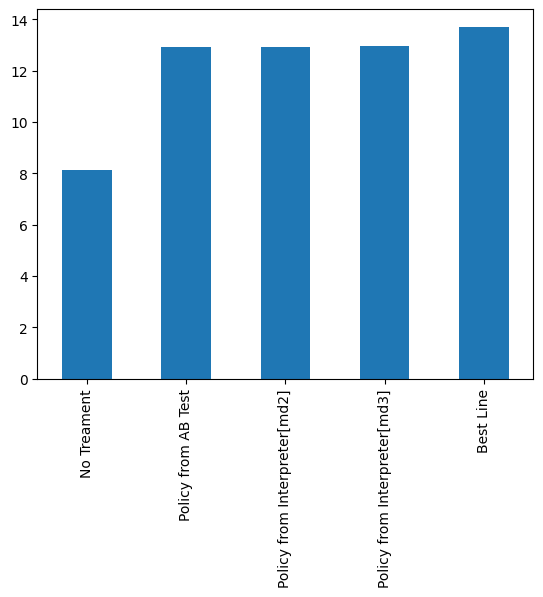

In [17]:
summary=pd.Series({
    'No Treament': v_no_t.mean(),
    'Policy from AB Test': v_AB.mean(),
    'Policy from Interpreter[md2]': v_policy.mean(),
    'Policy from Interpreter[md3]': v_policy3.mean(),
    'Best Line': v_best.mean()
    },name=f'Mean of Y').to_frame()
summary.plot(kind='bar',legend=False)
summary

Conclusion: increasing the maximum depth of the policy tree, may improve the performance.

## compare dml estimator

[Text(0.5, 0.8333333333333334, 'x0 <= 1.5\nsamples = 6723\nvalue = [[0.0]\n[2.547]]'),
 Text(0.25, 0.5, 'x5 <= 2.537\nsamples = 6669\nvalue = [[0.0]\n[2.57]]'),
 Text(0.125, 0.16666666666666666, 'samples = 6615\nvalue = [[0.0]\n[2.594]]'),
 Text(0.375, 0.16666666666666666, 'samples = 54\nvalue = [[0.0]\n[-0.266]]'),
 Text(0.75, 0.5, 'x4 <= -1.129\nsamples = 54\nvalue = [[0.0]\n[-0.293]]'),
 Text(0.625, 0.16666666666666666, 'samples = 9\nvalue = [[0.0]\n[0.853]]'),
 Text(0.875, 0.16666666666666666, 'samples = 45\nvalue = [[0.0]\n[-0.522]]')]

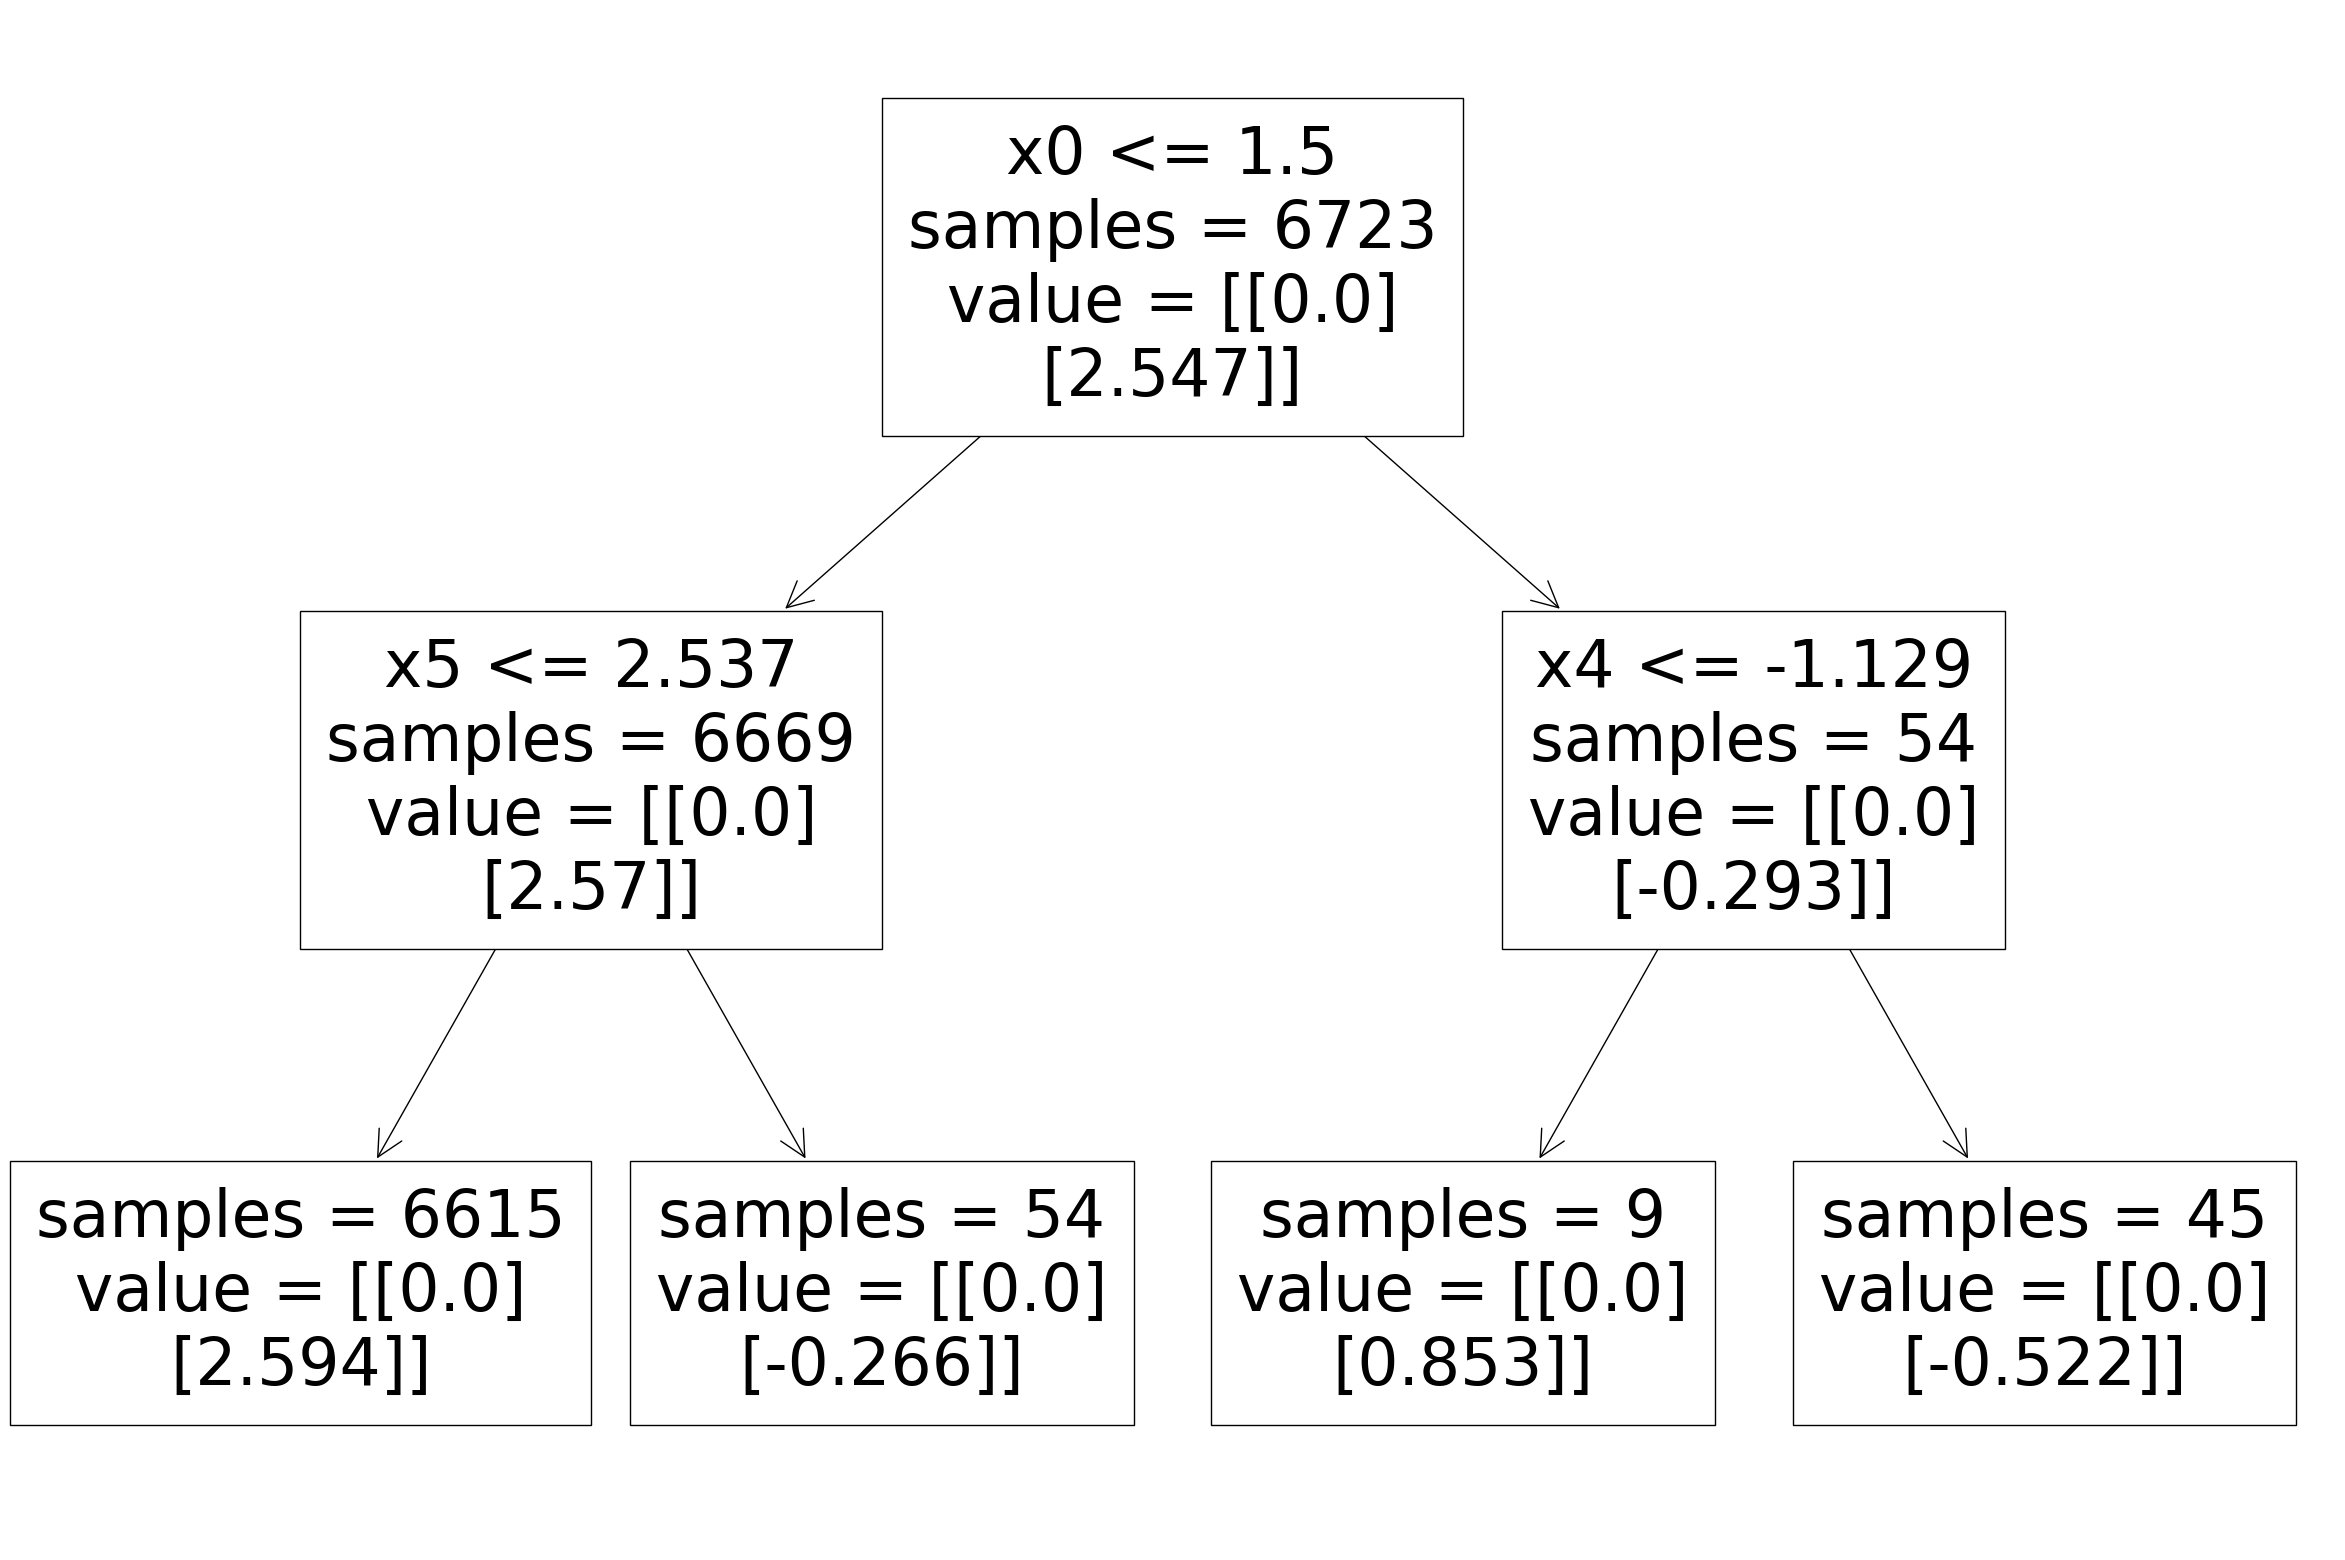

In [18]:
why_dml=Why(estimator='dml')
why_dml.fit(train_data,outcome='y_factual',treatment='treatment')
pi_dml=why_dml.policy_interpreter(train_data, max_depth=2)
plt.figure(figsize=(30, 20), )
pi_dml.plot()

In [19]:
def policy_from_ti_dml(row):
    if row['x0'] <= 1.5:
        if row['x5'] > 2.537:
            return 0
    else:
        if row['x1'] > -0.796:
            return 0
    return 1
t_from_policy_dml = df.apply(policy_from_ti_dml, axis = 1)
df_cp= df.copy()
df_cp['policy'] = t_from_policy_dml
v_policy_dml = df_cp.apply(lambda d: d['y_factual'] if d['treatment']==d['policy'] 
               else d['y_cfactual'], 
               axis=1)
v_policy_dml.mean()

12.918878764940455

In [ ]:
why_dr=Why(estimator='dr')
why_dr.fit(train_data,outcome='y_factual',treatment='treatment')
pi_dr=why_dr.policy_interpreter(train_data, max_depth=2)
plt.figure(figsize=(10, 6), )
pi_dr.plot()

In [21]:
def policy_from_ti_dr(row):
    if row['x0'] > 1.5:
        if row['x1'] > 1.196:
            return 0
    return 1
t_from_policy_dr = df.apply(policy_from_ti_dr, axis = 1)
df_cp= df.copy()
df_cp['policy'] = t_from_policy_dr
v_policy_dr = df_cp.apply(lambda d: d['y_factual'] if d['treatment']==d['policy'] 
               else d['y_cfactual'], 
               axis=1)
v_policy_dr.mean()

12.90925288955385

[Text(0.5, 0.8333333333333334, 'x5 <= 2.372\nsamples = 6723\nvalue = [[0.0]\n[4.733]]'),
 Text(0.25, 0.5, 'x0 <= 1.5\nsamples = 6642\nvalue = [[0.0]\n[4.813]]'),
 Text(0.125, 0.16666666666666666, 'samples = 6588\nvalue = [[0.0]\n[4.864]]'),
 Text(0.375, 0.16666666666666666, 'samples = 54\nvalue = [[0.0]\n[-1.456]]'),
 Text(0.75, 0.5, 'x1 <= 0.197\nsamples = 81\nvalue = [[0.0]\n[-1.813]]'),
 Text(0.625, 0.16666666666666666, 'samples = 27\nvalue = [[0.0]\n[2.103]]'),
 Text(0.875, 0.16666666666666666, 'samples = 54\nvalue = [[0.0]\n[-3.771]]')]

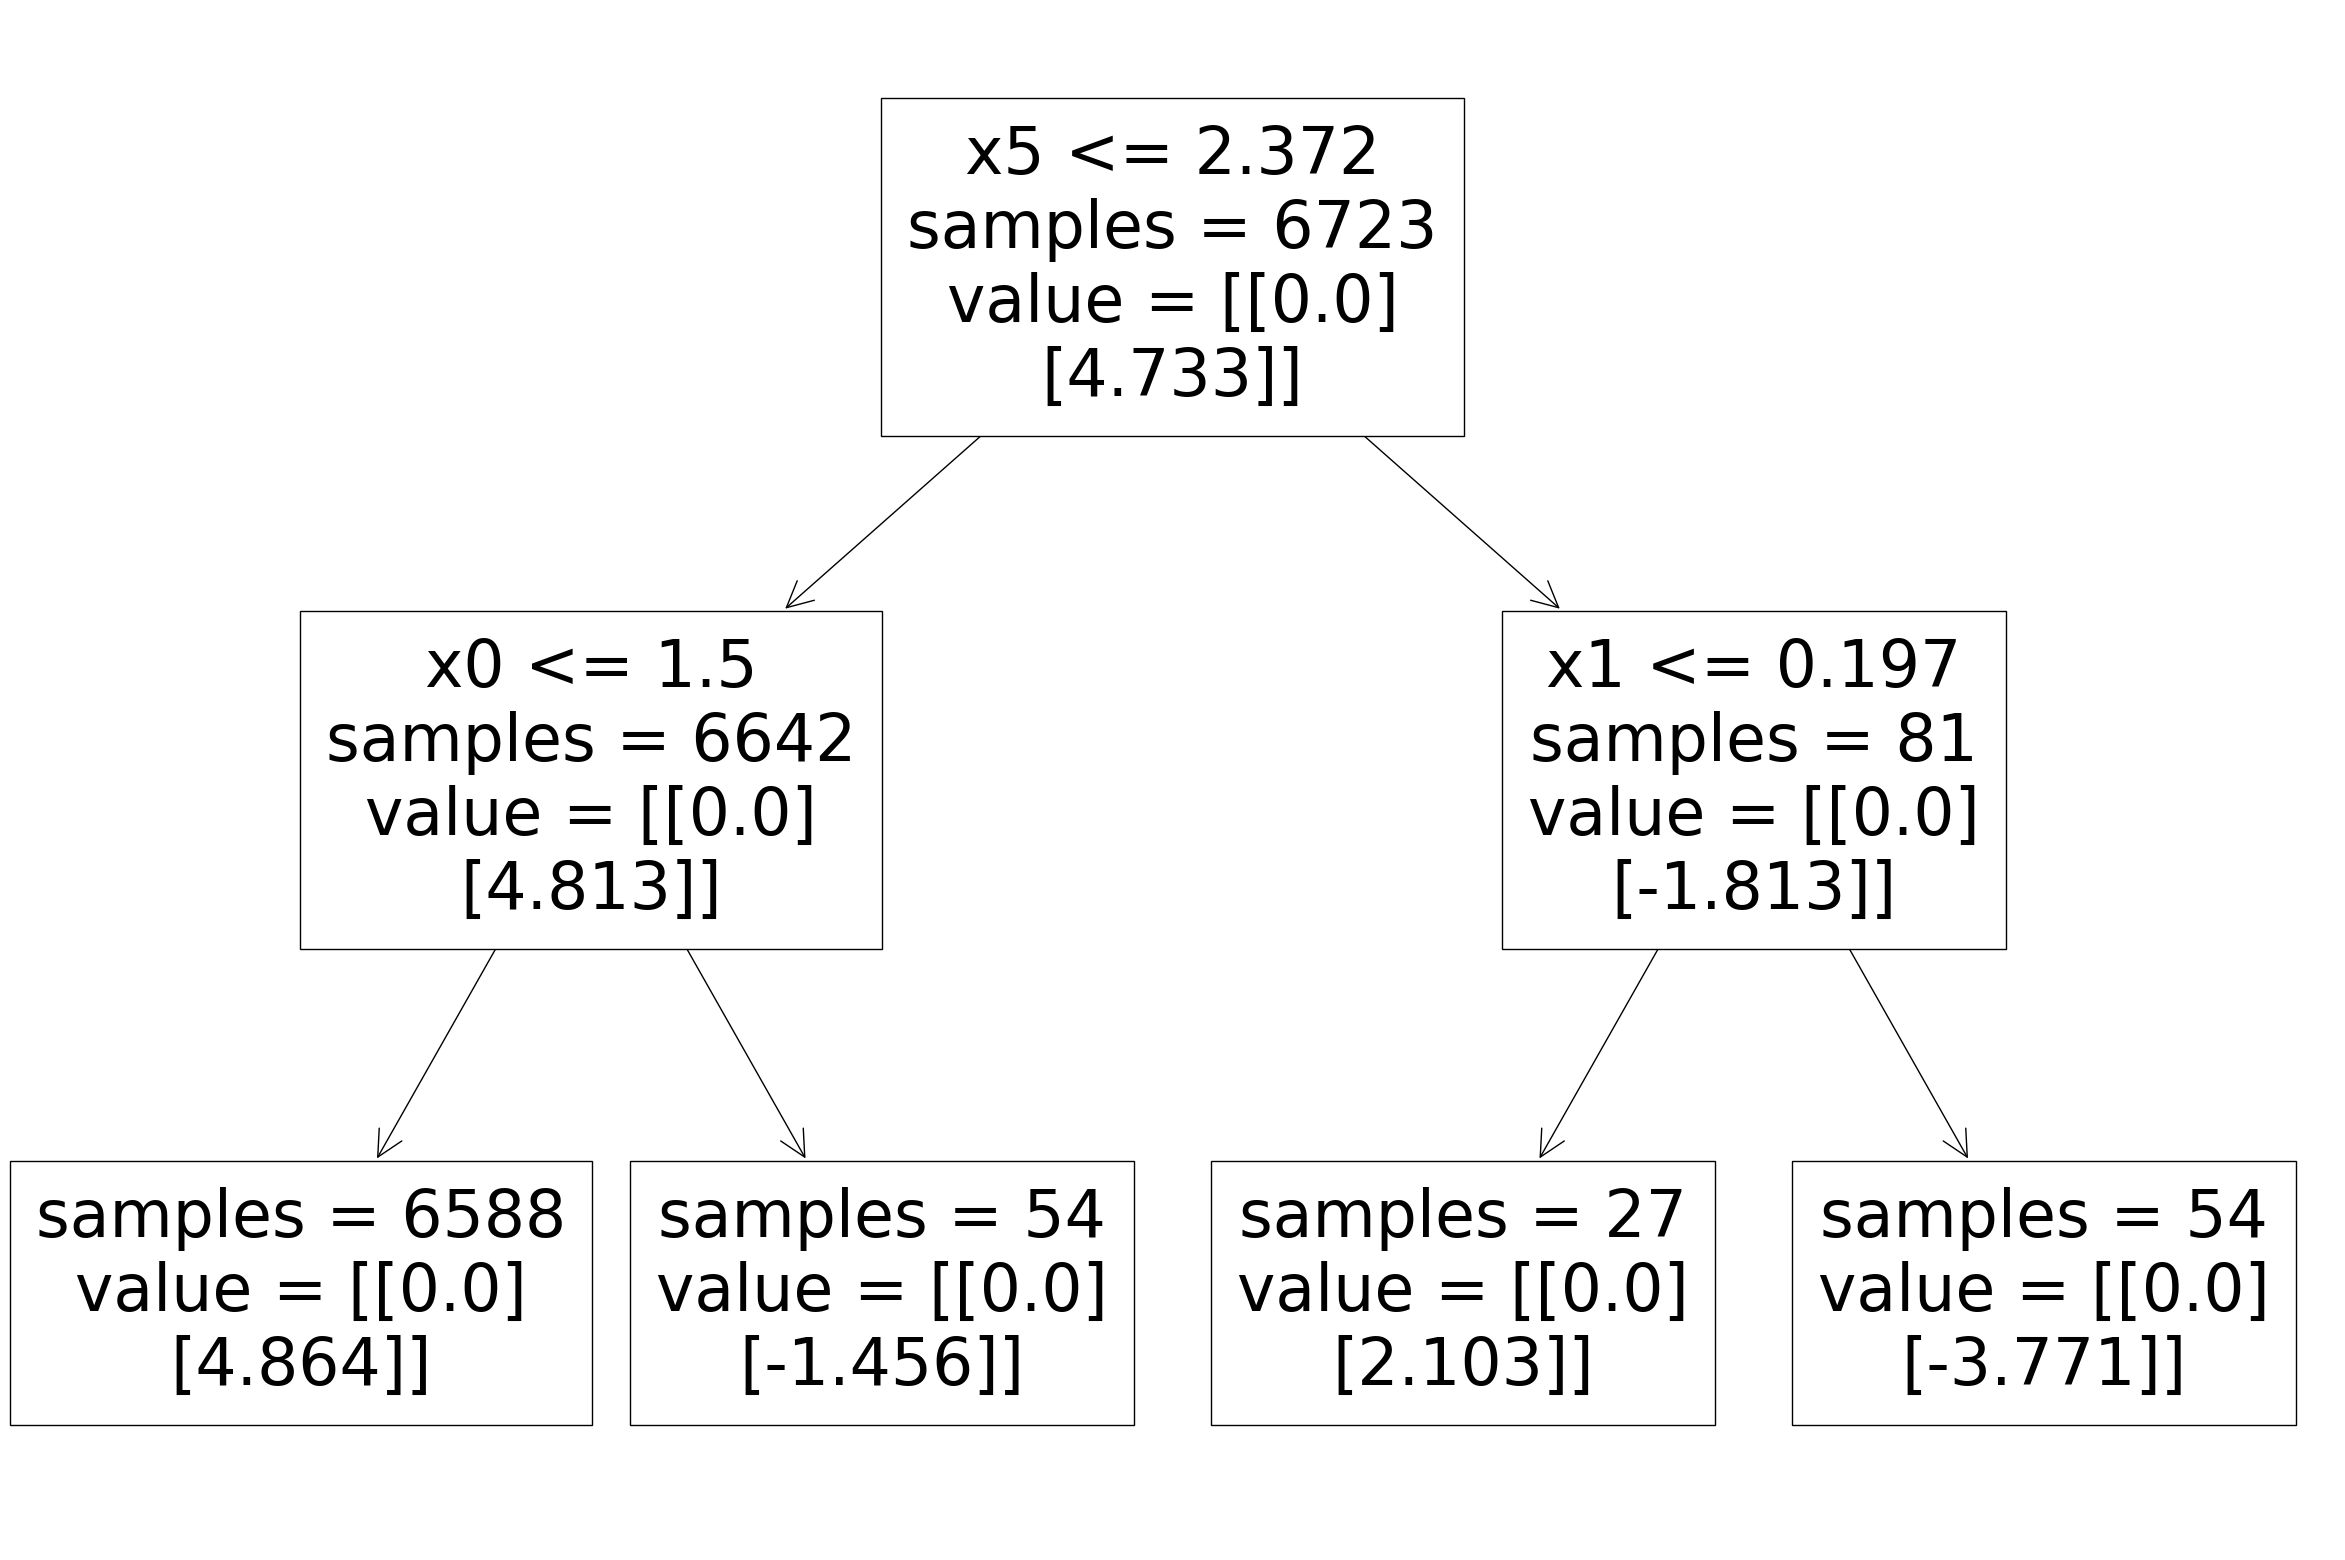

In [22]:
why_meta_learner=Why(estimator='meta_leaner')
why_meta_learner.fit(train_data,outcome='y_factual',treatment='treatment')
pi_meta_learner=why_meta_learner.policy_interpreter(train_data, max_depth=2)
plt.figure(figsize=(30, 20), )
pi_meta_learner.plot()

In [23]:
def policy_from_ti_meta(row):
    if row['x5'] > 2.372:
        if row['x0'] > 1.5:
            return 0
    else:
        if row['x1'] > 0.197:
            return 0        
    return 1
t_from_policy_meta = df.apply(policy_from_ti_meta, axis = 1)
df_cp= df.copy()
df_cp['policy'] = t_from_policy_meta
v_policy_meta = df_cp.apply(lambda d: d['y_factual'] if d['treatment']==d['policy'] 
               else d['y_cfactual'], 
               axis=1)
v_policy_meta.mean()

11.88472013442986

,Mean of Y
No Treament,8.143555
Policy from AB Test,12.903273
Policy from Interpreter[md2],12.935318
Policy from Interpreter[md3],12.939722
Policy from Interpreter[dml],12.918879
Policy from Interpreter[dr],12.909253
Policy from Interpreter[meta],11.884720
Policy Best,13.704696


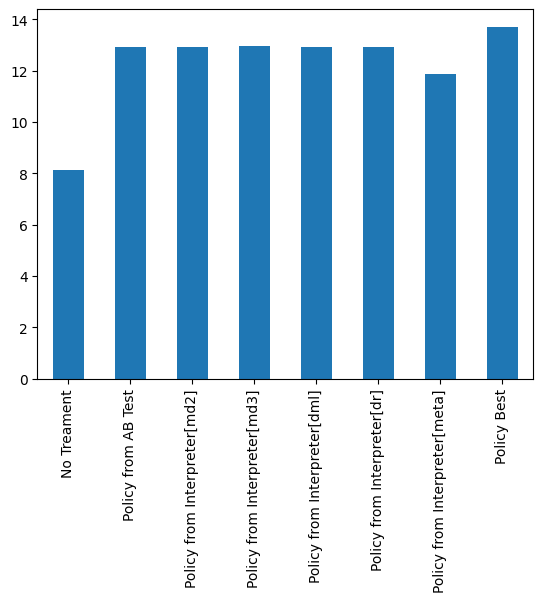

In [25]:
summary=pd.Series({
    'No Treament': v_no_t.mean(),
    'Policy from AB Test': v_AB.mean(),
    'Policy from Interpreter[md2]': v_policy.mean(),
    'Policy from Interpreter[md3]': v_policy3.mean(),
    'Policy from Interpreter[dml]': v_policy_dml.mean(),    
    'Policy from Interpreter[dr]': v_policy_dr.mean(),
    'Policy from Interpreter[meta]': v_policy_meta.mean(),
    'Policy Best': v_best.mean()
    },name=f'Mean of Y').to_frame()
summary.plot(kind='bar',legend=False)
summary